In [1]:
import pandas as pd
import numpy as np
import json
import ast
import re
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
#from icecream import ic
pd.options.mode.chained_assignment = None  # default='warn'

In [19]:
def get_cpc_cluster_count(prediction_df, label, cpc_stem='Y02E10', **kwargs):
    filtered_df = prediction_df[prediction_df.Z == label]
    filtered_cpc_codes = filtered_df.cpc_codes
    cpc_codes_by_label = [ast.literal_eval(row) for row in filtered_cpc_codes]
    cpc_codes_by_label_flat = [item for elem in cpc_codes_by_label for item in elem]
    cpc_series = pd.Series(cpc_codes_by_label_flat)
    cpc_stem_series = cpc_series[cpc_series.str.startswith(cpc_stem)]
    print(f'CLUSTER {label}')
    print(cpc_stem_series.value_counts(**kwargs))

In [58]:
def get_cpc_co_cluster_count(prediction_df, label, cpc_stem='', **kwargs):
    filtered_df = prediction_df[prediction_df.Z == label]
    filtered_cpc_codes = filtered_df.cpc_codes
    cpc_codes_by_label = [ast.literal_eval(row) for row in filtered_cpc_codes]
    cpc_codes_by_label_flat = [item for elem in cpc_codes_by_label for item in elem]
    cpc_series = pd.Series(cpc_codes_by_label_flat)
    cpc_stem_series = cpc_series[cpc_series.str.startswith(cpc_stem)]
    print(f'CLUSTER {label}')
    return(cpc_stem_series.value_counts(**kwargs))

# TP1 1980 - 1995

In [3]:
df = pd.read_csv('atp1_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_extra = df_dropped.join(df_cpc)
df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [4]:
df_vector_extra # not re indexed so you could pass those predictions back into the data frame and then filter 

,A01,A43,A47,B01,B05,B08,B21,B22,B23,B25,...,G21,H01,H02,H03,H04,H05,Y02,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.194444,0.0,0.0,0.0,0.0,0.194444,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.216667,0.216667,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.289718,0.223051,"['F03D3/0409', 'F03D3/0409', 'F03D9/12', 'F03D...",['System for the generation of electrical ener...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.000000,"['H01G9/20', 'H01M4/60', 'H01M6/181', 'H01M14/...",['Method for production of photoelectrochemica...
6529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.083333,0.0,0.0,0.0,0.0,0.083333,0.000000,"['H01L31/0693', 'H01L31/022425', 'H01L31/02245...",['Solar cells and method for producing solar c...
6536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.285936,0.0,0.0,0.0,0.0,0.285936,0.202020,"['H01L31/077', 'H01L31/077', 'H01L21/02422', '...",['Method of making pin junction semiconductor ...
6539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.181818,0.0,0.0,0.0,0.0,0.181818,0.090909,"['H01L31/065', 'H01L31/065', 'H01L31/0352', 'H...",['Pin junction photovoltaic element having an ...


In [5]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp1 = hc.fit_predict(X)
y_tp1 = pd.DataFrame(y_tp1, columns = ['Y'])
y_tp1

,Y
0,1
1,0
2,2
3,0
4,1
...,...
3674,2
3675,2
3676,2
3677,2


In [6]:
#1st round predictions
df_combined_1 = df_vector_cpc.join(y_tp1)
tp1_predictions = df_combined_1[['cpc_codes','Y','invention_title']]
tp1_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
2,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
3,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
4,"['F03D3/0409', 'F03D3/0409', 'F03D9/12', 'F03D...",1,['System for the generation of electrical ener...
...,...,...,...
3674,"['H01G9/20', 'H01M4/60', 'H01M6/181', 'H01M14/...",2,['Method for production of photoelectrochemica...
3675,"['H01L31/0693', 'H01L31/022425', 'H01L31/02245...",2,['Solar cells and method for producing solar c...
3676,"['H01L31/077', 'H01L31/077', 'H01L21/02422', '...",2,['Method of making pin junction semiconductor ...
3677,"['H01L31/065', 'H01L31/065', 'H01L31/0352', 'H...",2,['Pin junction photovoltaic element having an ...


In [7]:
df_vector_extra = df_vector_extra.reset_index(drop=True)

In [8]:
df_vector_extra

,A01,A43,A47,B01,B05,B08,B21,B22,B23,B25,...,G21,H01,H02,H03,H04,H05,Y02,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.194444,0.0,0.0,0.0,0.0,0.194444,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.216667,0.216667,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.289718,0.223051,"['F03D3/0409', 'F03D3/0409', 'F03D9/12', 'F03D...",['System for the generation of electrical ener...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.000000,"['H01G9/20', 'H01M4/60', 'H01M6/181', 'H01M14/...",['Method for production of photoelectrochemica...
3675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.083333,0.0,0.0,0.0,0.0,0.083333,0.000000,"['H01L31/0693', 'H01L31/022425', 'H01L31/02245...",['Solar cells and method for producing solar c...
3676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.285936,0.0,0.0,0.0,0.0,0.285936,0.202020,"['H01L31/077', 'H01L31/077', 'H01L21/02422', '...",['Method of making pin junction semiconductor ...
3677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.181818,0.0,0.0,0.0,0.0,0.181818,0.090909,"['H01L31/065', 'H01L31/065', 'H01L31/0352', 'H...",['Pin junction photovoltaic element having an ...


In [9]:
df_vector_extra['Y']= tp1_predictions['Y']


In [10]:
second_clustering_input = df_vector_extra
df_vector_extra = df_vector_extra[df_vector_extra.Y ==2]
df_vector_extra = df_vector_extra.reset_index(drop=True)
#result = pd.concat([df1, df4], axis=1, join="inner")
#second_clustering_input = pd.concat([df_vector_extra, tp2_predictions], axis=1,join='inner')
#.reindex(df1.index)

#second_clustering_input = df_vector_extra.join(tp2_predictions)

In [11]:
second_clustering_input = second_clustering_input[second_clustering_input.Y == 2]
second_clustering_input = second_clustering_input.reset_index(drop=True)

In [12]:
second_clustering_input #then combine this with predictions of second clustering and then you have results from 1st and second clustering 

,A01,A43,A47,B01,B05,B08,B21,B22,B23,B25,...,H01,H02,H03,H04,H05,Y02,Y10,cpc_codes,invention_title,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194444,0.0,0.0,0.0,0.0,0.194444,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device'],2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.152020,0.0,0.0,0.0,0.0,1.152020,0.424242,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",['P and n-type microcrystalline semiconductor ...,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.206667,0.0,0.0,0.0,0.0,0.206667,0.055556,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",['Solar cell encapsulation'],2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.371902,0.0,0.0,0.0,0.0,0.371902,0.076923,"['G06F9/4843', 'G06F9/4843', 'H01L31/02963', '...",['Functional ZnSe:H deposited films'],2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090909,0.0,0.0,0.0,0.0,0.090909,0.000000,"['H01L31/0384', 'H01L31/03682', 'Y02E10/546', ...",['Method of making semicrystalline silicon art...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.111111,0.000000,"['H01G9/20', 'H01M4/60', 'H01M6/181', 'H01M14/...",['Method for production of photoelectrochemica...,2
1105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.083333,0.0,0.0,0.0,0.0,0.083333,0.000000,"['H01L31/0693', 'H01L31/022425', 'H01L31/02245...",['Solar cells and method for producing solar c...,2
1106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285936,0.0,0.0,0.0,0.0,0.285936,0.202020,"['H01L31/077', 'H01L31/077', 'H01L21/02422', '...",['Method of making pin junction semiconductor ...,2
1107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.181818,0.0,0.0,0.0,0.0,0.181818,0.090909,"['H01L31/065', 'H01L31/065', 'H01L31/0352', 'H...",['Pin junction photovoltaic element having an ...,2


In [13]:
second_clustering_input = second_clustering_input.drop(columns=['cpc_codes','invention_title','Y'])
# second roundnormalize the data attributes
df_normalized_2 = preprocessing.normalize(second_clustering_input)
data_normalized = pd.DataFrame(df_normalized_2, columns=second_clustering_input.columns)
X = data_normalized 

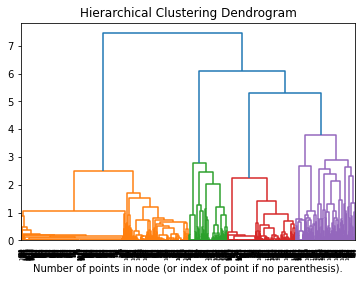

In [14]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [15]:
hc = AgglomerativeClustering(n_clusters= 4,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
z_tp1 = hc.fit_predict(X)
z_tp1 = pd.DataFrame(z_tp1, columns = ['Z'])
z_tp1

,Z
0,1
1,1
2,0
3,1
4,1
...,...
1104,1
1105,1
1106,3
1107,3


In [16]:
second_clustering_output = df_vector_extra.join(z_tp1)
z_tp1_predictions = second_clustering_output[['cpc_codes','Y','invention_title','Z']]
z_tp1_predictions





,cpc_codes,Y,invention_title,Z
0,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device'],1
1,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",2,['P and n-type microcrystalline semiconductor ...,1
2,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",2,['Solar cell encapsulation'],0
3,"['G06F9/4843', 'G06F9/4843', 'H01L31/02963', '...",2,['Functional ZnSe:H deposited films'],1
4,"['H01L31/0384', 'H01L31/03682', 'Y02E10/546', ...",2,['Method of making semicrystalline silicon art...,1
...,...,...,...,...
1104,"['H01G9/20', 'H01M4/60', 'H01M6/181', 'H01M14/...",2,['Method for production of photoelectrochemica...,1
1105,"['H01L31/0693', 'H01L31/022425', 'H01L31/02245...",2,['Solar cells and method for producing solar c...,1
1106,"['H01L31/077', 'H01L31/077', 'H01L21/02422', '...",2,['Method of making pin junction semiconductor ...,3
1107,"['H01L31/065', 'H01L31/065', 'H01L31/0352', 'H...",2,['Pin junction photovoltaic element having an ...,3


In [17]:
for i in range(4):
    get_cpc_cluster_count(z_tp1_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/50     109
Y02E10/52      49
Y02E10/547     21
Y02E10/544     17
Y02E10/549     16
Y02E10/40      15
Y02E10/548     15
Y02E10/44      15
Y02E10/546     12
Y02E10/543      8
Y02E10/60       7
Y02E10/47       7
Y02E10/56       6
Y02E10/542      3
Y02E10/541      1
dtype: int64

CLUSTER 1
Y02E10/50     263
Y02E10/548    191
Y02E10/547    165
Y02E10/52      78
Y02E10/544     64
Y02E10/543     35
Y02E10/546     24
Y02E10/541     17
Y02E10/542     13
Y02E10/549      9
Y02E10/40       4
Y02E10/545      4
Y02E10/47       2
Y02E10/60       2
Y02E10/44       1
dtype: int64

CLUSTER 2
Y02E10/50     83
Y02E10/548    69
Y02E10/547    10
Y02E10/543     9
Y02E10/541     7
Y02E10/52      7
Y02E10/546     6
Y02E10/40      5
Y02E10/30      2
Y02E10/549     2
Y02E10/544     2
Y02E10/545     1
Y02E10/542     1
dtype: int64

CLUSTER 3
Y02E10/50     115
Y02E10/548     75
Y02E10/547     54
Y02E10/544     32
Y02E10/543     20
Y02E10/541     19
Y02E10/546     13
Y02E10/52      12
Y02E10/549   

# TP2 1980 - 2008

In [2]:
df = pd.read_csv('atp2_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_extra = df_dropped.join(df_cpc)
df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [3]:
df_vector_extra # not re indexed so you could pass those predictions back into the data frame and then filter 

,A01,A22,A41,A43,A45,A47,A61,A62,A63,B01,...,H01,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.333333,0.0,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.088590,0.0,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.090909,0.0,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.927020,0.000000,0.0,0.0,0.0,0.927020,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114907,0.200388,0.0,0.0,0.0,0.555150,0.0,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250000,0.000000,0.0,0.0,0.0,0.250000,0.0,0.000000,"['H01L31/0512', 'H01L31/0508', 'Y02E10/50']",['Solar cell module']
20359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050000,0.000000,0.0,0.0,0.0,0.050000,0.0,0.000000,"['B82Y10/00', 'B82Y10/00', 'H01L27/302', 'H01L...",['ORGANIC HYBRID PLANAR-NANOCRYSTALLINE BULK H...
20362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012195,0.000000,0.0,0.0,0.0,0.012195,0.0,0.000000,"['H01J37/185', 'H01L21/67754', 'H01L21/67754',...",['METHOD AND SYSTEM FOR CONTINUOUS LARGE-AREA ...
20365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.090665,0.0,0.0,0.0,0.164750,0.0,0.052632,"['F03D7/0284', 'F03D7/0284', 'F03D7/0224', 'F0...",['Power system with low voltage ride-through c...


In [4]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp2 = hc.fit_predict(X)
y_tp2 = pd.DataFrame(y_tp2, columns = ['Y'])
y_tp2

,Y
0,1
1,1
2,0
3,2
4,0
...,...
13070,2
13071,2
13072,2
13073,1


In [5]:
#1st round predictions
df_combined_2 = df_vector_cpc.join(y_tp2)
tp2_predictions = df_combined_2[['cpc_codes','Y','invention_title']]
tp2_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
13070,"['H01L31/0512', 'H01L31/0508', 'Y02E10/50']",2,['Solar cell module']
13071,"['B82Y10/00', 'B82Y10/00', 'H01L27/302', 'H01L...",2,['ORGANIC HYBRID PLANAR-NANOCRYSTALLINE BULK H...
13072,"['H01J37/185', 'H01L21/67754', 'H01L21/67754',...",2,['METHOD AND SYSTEM FOR CONTINUOUS LARGE-AREA ...
13073,"['F03D7/0284', 'F03D7/0284', 'F03D7/0224', 'F0...",1,['Power system with low voltage ride-through c...


In [6]:
df_vector_extra = df_vector_extra.reset_index(drop=True)

In [7]:
df_vector_extra

,A01,A22,A41,A43,A45,A47,A61,A62,A63,B01,...,H01,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.333333,0.0,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.088590,0.0,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.090909,0.0,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.927020,0.000000,0.0,0.0,0.0,0.927020,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114907,0.200388,0.0,0.0,0.0,0.555150,0.0,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250000,0.000000,0.0,0.0,0.0,0.250000,0.0,0.000000,"['H01L31/0512', 'H01L31/0508', 'Y02E10/50']",['Solar cell module']
13071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050000,0.000000,0.0,0.0,0.0,0.050000,0.0,0.000000,"['B82Y10/00', 'B82Y10/00', 'H01L27/302', 'H01L...",['ORGANIC HYBRID PLANAR-NANOCRYSTALLINE BULK H...
13072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012195,0.000000,0.0,0.0,0.0,0.012195,0.0,0.000000,"['H01J37/185', 'H01L21/67754', 'H01L21/67754',...",['METHOD AND SYSTEM FOR CONTINUOUS LARGE-AREA ...
13073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.090665,0.0,0.0,0.0,0.164750,0.0,0.052632,"['F03D7/0284', 'F03D7/0284', 'F03D7/0224', 'F0...",['Power system with low voltage ride-through c...


In [8]:
df_vector_extra['Y']= tp2_predictions['Y']


In [9]:
second_clustering_input = df_vector_extra
df_vector_extra = df_vector_extra[df_vector_extra.Y ==2]
df_vector_extra = df_vector_extra.reset_index(drop=True)
#result = pd.concat([df1, df4], axis=1, join="inner")
#second_clustering_input = pd.concat([df_vector_extra, tp2_predictions], axis=1,join='inner')
#.reindex(df1.index)

#second_clustering_input = df_vector_extra.join(tp2_predictions)

In [10]:
second_clustering_input = second_clustering_input[second_clustering_input.Y == 2]
second_clustering_input = second_clustering_input.reset_index(drop=True)

In [11]:
second_clustering_input #then combine this with predictions of second clustering and then you have results from 1st and second clustering 

,A01,A22,A41,A43,A45,A47,A61,A62,A63,B01,...,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.927020,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device'],2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.815317,0.0,0.424242,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",['P and n-type microcrystalline semiconductor ...,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.089200,0.0,0.0,0.0,0.386775,0.0,0.226319,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",['Solar cell encapsulation'],2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.074074,0.0,0.000000,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",['Oblique compound parabolic reflector'],2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224025,0.0,0.0,0.0,0.724056,0.0,0.300948,"['G06F9/4843', 'G06F9/4843', 'H01L31/02963', '...",['Functional ZnSe:H deposited films'],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.013333,0.0,0.013333,"['C03C17/009', 'C03C17/009', 'C03C17/25', 'C03...",['Method of making a photovoltaic device with ...,2
4749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.052632,0.0,0.000000,"['H01L51/0097', 'H01L51/0097', 'H01L51/5243', ...",['Flat panel display and method of manufacturi...,2
4750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.250000,0.0,0.000000,"['H01L31/0512', 'H01L31/0508', 'Y02E10/50']",['Solar cell module'],2
4751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.050000,0.0,0.000000,"['B82Y10/00', 'B82Y10/00', 'H01L27/302', 'H01L...",['ORGANIC HYBRID PLANAR-NANOCRYSTALLINE BULK H...,2


In [12]:
second_clustering_input = second_clustering_input.drop(columns=['cpc_codes','invention_title','Y'])
# second roundnormalize the data attributes
df_normalized_2 = preprocessing.normalize(second_clustering_input)
data_normalized = pd.DataFrame(df_normalized_2, columns=second_clustering_input.columns)
X = data_normalized 

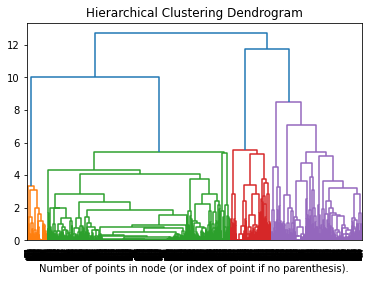

In [14]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [13]:
hc = AgglomerativeClustering(n_clusters= 4,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
z_tp2 = hc.fit_predict(X)
z_tp2 = pd.DataFrame(z_tp2, columns = ['Z'])
z_tp2

,Z
0,1
1,1
2,0
3,1
4,0
...,...
4748,0
4749,2
4750,0
4751,1


In [14]:
second_clustering_output = df_vector_extra.join(z_tp2)
z_tp2_predictions = second_clustering_output[['cpc_codes','Y','invention_title','Z']]
z_tp2_predictions





,cpc_codes,Y,invention_title,Z
0,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device'],1
1,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",2,['P and n-type microcrystalline semiconductor ...,1
2,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",2,['Solar cell encapsulation'],0
3,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",2,['Oblique compound parabolic reflector'],1
4,"['G06F9/4843', 'G06F9/4843', 'H01L31/02963', '...",2,['Functional ZnSe:H deposited films'],0
...,...,...,...,...
4748,"['C03C17/009', 'C03C17/009', 'C03C17/25', 'C03...",2,['Method of making a photovoltaic device with ...,0
4749,"['H01L51/0097', 'H01L51/0097', 'H01L51/5243', ...",2,['Flat panel display and method of manufacturi...,2
4750,"['H01L31/0512', 'H01L31/0508', 'Y02E10/50']",2,['Solar cell module'],0
4751,"['B82Y10/00', 'B82Y10/00', 'H01L27/302', 'H01L...",2,['ORGANIC HYBRID PLANAR-NANOCRYSTALLINE BULK H...,1


In [129]:
for i in range(4):
    get_cpc_cluster_count(z_tp2_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/50     589
Y02E10/549    335
Y02E10/547    327
Y02E10/548    207
Y02E10/52     122
Y02E10/544    116
Y02E10/542    100
Y02E10/546     88
Y02E10/543     70
Y02E10/541     60
Y02E10/40      35
Y02E10/545     32
Y02E10/44      14
Y02E10/56      13
Y02E10/47       8
Y02E10/60       4
Y02E10/72       2
Y02E10/46       2
dtype: int64

CLUSTER 1
Y02E10/547    860
Y02E10/50     800
Y02E10/548    717
Y02E10/52     440
Y02E10/549    395
Y02E10/542    376
Y02E10/544    258
Y02E10/541    247
Y02E10/546    171
Y02E10/545    110
Y02E10/543    106
Y02E10/40      46
Y02E10/44      40
Y02E10/47      30
Y02E10/60      19
Y02E10/56       8
Y02E10/46       8
Y02E10/30       4
dtype: int64

CLUSTER 2
Y02E10/549    489
Y02E10/542    149
Y02E10/547     85
Y02E10/50      68
Y02E10/546     42
Y02E10/544     36
Y02E10/548     35
Y02E10/52      32
Y02E10/541     18
Y02E10/40      10
Y02E10/545      8
Y02E10/543      7
Y02E10/44       3
dtype: int64

CLUSTER 3
Y02E10/541    151
Y02E10/50     120


In [130]:
cluster_0_coclass = get_cpc_co_cluster_count(z_tp2_predictions, 0)
print(cluster_0_coclass.to_string())
# print()

CLUSTER 0
Y02P70/50         972
Y02E10/50         589
Y02E10/549        335
Y02E10/547        327
H01L31/1804       246
H01L31/048        216
Y02E10/548        207
H01L31/202        150
H01L31/046        144
H01L31/022425     137
H01L31/03921      124
H01L31/075        124
Y02E10/52         122
Y02E10/544        116
H01L21/02532      103
H01L31/18         101
Y02E10/542        100
H01L31/068         89
Y02E10/546         88
H01L21/0262        88
H01L31/022466      86
H01L51/5012        83
H01L51/0059        73
H01L31/056         72
C09K11/06          72
Y10S428/917        71
Y02E10/543         70
Y02B10/10          70
H01L31/182         68
H01L31/02363       66
H01L31/206         64
H01L31/1884        64
Y10S136/29         63
H01L21/02422       63
B32B17/10788       62
C30B29/06          61
Y02E10/541         60
H01L31/186         60
H01L31/076         59
H01L51/0035        59
H01L51/0052        59
H01L21/02579       58
H01L31/204         58
H01G9/2031         57
H01L31/208         56


In [133]:
cluster_1_coclass = get_cpc_co_cluster_count(z_tp2_predictions, 1)
print(cluster_1_coclass.to_string())
# print()

CLUSTER 1
Y02P70/50         2019
Y02E10/547         860
Y02E10/50          800
Y02E10/548         717
H01L31/1804        600
H01L31/022425      476
Y02E10/52          440
H01L31/202         434
Y02E10/549         395
Y02E10/542         376
H01L31/075         371
H01G9/2031         322
H01L31/076         269
Y02E10/544         258
Y02E10/541         247
H01L31/048         242
H01L31/068         241
H01L31/03921       237
H01L31/056         214
H01L31/046         206
H01L31/035281      195
Y02E10/546         171
H01L31/0322        168
H01L21/02532       163
H01L31/022466      158
H01L31/206         158
H01L31/02363       155
H01L31/0547        143
H01L31/03529       138
H01L31/1884        133
H01L31/02168       128
H01L31/18          127
H01L31/0749        127
H01L31/204         126
H01L31/0687        123
H01L21/0262        121
H01L2924/0002      119
H01L51/0097        116
Y02B10/10          115
H01G9/2059         112
Y02E10/545         110
H01L31/182         110
Y02E10/543         106
H

In [131]:
cluster_2_coclass = get_cpc_co_cluster_count(z_tp2_predictions, 2)
print(cluster_2_coclass.to_string())
# print()

CLUSTER 2
Y02E10/549        489
Y02P70/50         398
B82Y10/00         307
B82Y30/00         202
H01L51/4253       158
Y02E10/542        149
H01L51/0037       149
H01L51/0036       142
H01L51/0078       108
H01L51/0053       104
H01L51/424         90
H01L51/0035        89
H01L51/0038        87
H01L2251/308       87
H01G9/2031         86
Y02E10/547         85
B82Y20/00          84
H01L51/4226        83
H01G9/2059         82
H01L51/4246        78
H01L31/0352        75
Y02E10/50          68
H01L31/1804        67
H01L51/0046        66
G11C13/0014        64
H01L51/4213        64
H01L51/0048        62
H01L21/02532       60
H01L27/302         59
Y02E60/10          57
H01L51/426         57
H01L51/0077        55
H01L21/0262        55
G11C13/025         54
G11C13/0019        51
H01L31/18          50
H01L51/0047        50
G11C2213/81        50
H01L51/0052        49
H01L51/0043        49
B01J37/349         48
Y10S977/882        48
Y10S977/847        48
C01B32/156         46
H01L31/06          46


# TP3 1980 - 2011

In [96]:
df = pd.read_csv('atp3_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_extra = df_dropped.join(df_cpc)
df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [97]:
df_vector_extra # not re indexed so you could pass those predictions back into the data frame and then filter 

,A01,A22,A41,A43,A45,A46,A47,A61,A62,A63,...,H01,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.333333,0.0,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.165513,0.0,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.090909,0.0,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.225769,0.010101,0.0,0.0,0.0,1.225769,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114907,0.245842,0.0,0.0,0.0,0.600604,0.0,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.009434,0.0,0.0,0.0,0.009434,0.0,0.000000,"['F24S25/61', 'F24S25/61', 'H01L31/048', 'H02S...",['Photovoltaic Roofing Elements']
37748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.474034,0.000000,0.0,0.0,0.0,0.474034,0.0,0.000000,"['H01L31/046', 'H01L31/046', 'H01L31/03928', '...",['CHALCOPYRITE TYPE SOLAR CELL']
37749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.027778,0.0,0.000000,"['F16L9/19', 'F16L9/19', 'F16L9/006', 'F16L9/0...",['GEOTHERMAL PIPE SYSTEM']
37762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.058824,0.000000,0.0,0.0,0.0,0.058824,0.0,0.000000,"['C09K3/10', 'C09K2200/0647', 'H01G9/2031', 'H...",['Sealing Agent for Photoelectric Converter an...


In [98]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp3 = hc.fit_predict(X)
y_tp3 = pd.DataFrame(y_tp3, columns = ['Y'])
y_tp3

,Y
0,1
1,1
2,0
3,2
4,0
...,...
24550,0
24551,2
24552,0
24553,2


In [99]:
#1st round predictions
df_combined_3 = df_vector_cpc.join(y_tp3)
tp3_predictions = df_combined_3[['cpc_codes','Y','invention_title']]
tp3_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
24550,"['F24S25/61', 'F24S25/61', 'H01L31/048', 'H02S...",0,['Photovoltaic Roofing Elements']
24551,"['H01L31/046', 'H01L31/046', 'H01L31/03928', '...",2,['CHALCOPYRITE TYPE SOLAR CELL']
24552,"['F16L9/19', 'F16L9/19', 'F16L9/006', 'F16L9/0...",0,['GEOTHERMAL PIPE SYSTEM']
24553,"['C09K3/10', 'C09K2200/0647', 'H01G9/2031', 'H...",2,['Sealing Agent for Photoelectric Converter an...


In [100]:
df_vector_extra = df_vector_extra.reset_index(drop=True)

In [101]:
df_vector_extra

,A01,A22,A41,A43,A45,A46,A47,A61,A62,A63,...,H01,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.333333,0.0,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.165513,0.0,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.090909,0.0,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.225769,0.010101,0.0,0.0,0.0,1.225769,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114907,0.245842,0.0,0.0,0.0,0.600604,0.0,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.009434,0.0,0.0,0.0,0.009434,0.0,0.000000,"['F24S25/61', 'F24S25/61', 'H01L31/048', 'H02S...",['Photovoltaic Roofing Elements']
24551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.474034,0.000000,0.0,0.0,0.0,0.474034,0.0,0.000000,"['H01L31/046', 'H01L31/046', 'H01L31/03928', '...",['CHALCOPYRITE TYPE SOLAR CELL']
24552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.027778,0.0,0.000000,"['F16L9/19', 'F16L9/19', 'F16L9/006', 'F16L9/0...",['GEOTHERMAL PIPE SYSTEM']
24553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.058824,0.000000,0.0,0.0,0.0,0.058824,0.0,0.000000,"['C09K3/10', 'C09K2200/0647', 'H01G9/2031', 'H...",['Sealing Agent for Photoelectric Converter an...


In [102]:
df_vector_extra['Y']= tp3_predictions['Y']


In [103]:
second_clustering_input = df_vector_extra
df_vector_extra = df_vector_extra[df_vector_extra.Y ==2]
df_vector_extra = df_vector_extra.reset_index(drop=True)
#result = pd.concat([df1, df4], axis=1, join="inner")
#second_clustering_input = pd.concat([df_vector_extra, tp2_predictions], axis=1,join='inner')
#.reindex(df1.index)

#second_clustering_input = df_vector_extra.join(tp2_predictions)

In [104]:
second_clustering_input = second_clustering_input[second_clustering_input.Y == 2]
second_clustering_input = second_clustering_input.reset_index(drop=True)

In [105]:
second_clustering_input #then combine this with predictions of second clustering and then you have results from 1st and second clustering 

,A01,A22,A41,A43,A45,A46,A47,A61,A62,A63,...,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010101,0.0,0.0,0.0,1.225769,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device'],2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,2.171095,0.0,0.434343,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",['P and n-type microcrystalline semiconductor ...,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.089200,0.0,0.0,0.0,0.664553,0.0,0.226319,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",['Solar cell encapsulation'],2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.074074,0.0,0.000000,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",['Oblique compound parabolic reflector'],2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224025,0.0,0.0,0.0,0.724056,0.0,0.300948,"['G06F9/4843', 'G06F9/4843', 'H01L31/02963', '...",['Functional ZnSe:H deposited films'],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.090909,0.0,0.000000,"['H01L51/4246', 'H01L27/302', 'H01L27/307', 'H...","['PHOTOELECTRIC DEVICE, IMAGING DEVICE, AND PH...",2
8934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.032258,0.0,0.000000,"['H01L31/024', 'H01L31/02008', 'H01L31/0203', ...",['SOLAR CELL MODULE'],2
8935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.039006,0.0,0.000000,"['H01L31/0322', 'H01L21/02568', 'H01L21/02614'...",['COATING METHOD AND COATING APPARATUS'],2
8936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.474034,0.0,0.000000,"['H01L31/046', 'H01L31/046', 'H01L31/03928', '...",['CHALCOPYRITE TYPE SOLAR CELL'],2


In [106]:
second_clustering_input = second_clustering_input.drop(columns=['cpc_codes','invention_title','Y'])
# second roundnormalize the data attributes
df_normalized_2 = preprocessing.normalize(second_clustering_input)
data_normalized = pd.DataFrame(df_normalized_2, columns=second_clustering_input.columns)
X = data_normalized 

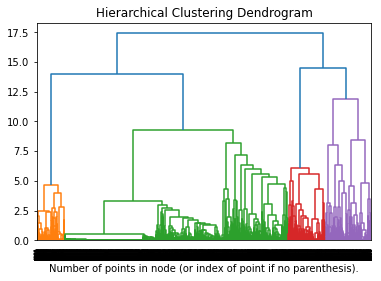

In [33]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [107]:
hc = AgglomerativeClustering(n_clusters= 4,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
z_tp3 = hc.fit_predict(X)
z_tp3 = pd.DataFrame(z_tp3, columns = ['Z'])
z_tp3

,Z
0,1
1,1
2,0
3,1
4,1
...,...
8933,1
8934,1
8935,3
8936,1


In [108]:
second_clustering_output = df_vector_extra.join(z_tp3)
z_tp3_predictions = second_clustering_output[['cpc_codes','Y','invention_title','Z']]
z_tp3_predictions





,cpc_codes,Y,invention_title,Z
0,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device'],1
1,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",2,['P and n-type microcrystalline semiconductor ...,1
2,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",2,['Solar cell encapsulation'],0
3,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",2,['Oblique compound parabolic reflector'],1
4,"['G06F9/4843', 'G06F9/4843', 'H01L31/02963', '...",2,['Functional ZnSe:H deposited films'],1
...,...,...,...,...
8933,"['H01L51/4246', 'H01L27/302', 'H01L27/307', 'H...",2,"['PHOTOELECTRIC DEVICE, IMAGING DEVICE, AND PH...",1
8934,"['H01L31/024', 'H01L31/02008', 'H01L31/0203', ...",2,['SOLAR CELL MODULE'],1
8935,"['H01L31/0322', 'H01L21/02568', 'H01L21/02614'...",2,['COATING METHOD AND COATING APPARATUS'],3
8936,"['H01L31/046', 'H01L31/046', 'H01L31/03928', '...",2,['CHALCOPYRITE TYPE SOLAR CELL'],1


In [109]:
for i in range(4):
    get_cpc_cluster_count(z_tp3_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/549    810
Y02E10/50     453
Y02E10/542    198
Y02E10/541     90
Y02E10/52      86
Y02E10/547     69
Y02E10/548     39
Y02E10/544     33
Y02E10/546     22
Y02E10/543     18
Y02E10/40      16
Y02E10/44      11
Y02E10/72       8
Y02E10/56       6
Y02E10/47       6
Y02E10/545      4
Y02E10/60       4
Y02E10/46       1
dtype: int64

CLUSTER 1
Y02E10/547    2239
Y02E10/50     2082
Y02E10/548    1221
Y02E10/52     1022
Y02E10/549     842
Y02E10/542     771
Y02E10/544     697
Y02E10/541     684
Y02E10/546     414
Y02E10/545     254
Y02E10/543     252
Y02E10/40       95
Y02E10/44       60
Y02E10/47       60
Y02E10/56       42
Y02E10/60       26
Y02E10/30        4
Y02E10/46        4
Y02E10/76        4
dtype: int64

CLUSTER 2
Y02E10/549    822
Y02E10/542    261
Y02E10/547    203
Y02E10/50     101
Y02E10/544     81
Y02E10/52      70
Y02E10/548     67
Y02E10/546     50
Y02E10/541     39
Y02E10/543     19
Y02E10/40      11
Y02E10/545      8
Y02E10/44       4
Y02E10/47       3
Y02E1

In [113]:
cluster_0_coclass = get_cpc_co_cluster_count(z_tp3_predictions, 0)
print(cluster_0_coclass.to_string())
# print()

CLUSTER 0
Y02E10/549        810
Y02P70/50         637
Y02E10/50         453
H01L31/048        217
Y02E10/542        198
C09K11/06         191
H01L51/5012       165
H01L51/0036       164
H01L51/0043       155
H01L51/0059       147
H01L31/0481       143
H05B33/14         141
H01G9/2031        136
H01L51/0035       127
Y10S428/917       120
H01L51/0097       116
H01L51/0053       112
B82Y10/00         108
H01L51/0039       107
H01G9/2059        105
B32B27/08         102
Y10T428/3154      102
H01L31/049        100
H01L51/0545        98
B32B17/10018       94
H01L51/0037        94
B32B17/10788       92
H01L51/0052        92
Y10T428/31786      90
Y02E10/541         90
H01L51/0072        88
Y02E10/52          86
C08G61/126         85
Y10T428/31855      76
H01L51/5048        76
H01L51/006         74
H01L31/0322        74
H01L31/18          73
C08G61/02          72
Y10T428/269        70
H01L51/0067        70
Y02E10/547         69
H01L51/0068        68
H01L51/0077        67
B32B17/10743       67


In [114]:
cluster_1_coclass = get_cpc_co_cluster_count(z_tp3_predictions, 1)
print(cluster_1_coclass.to_string())
# print()

CLUSTER 1
Y02P70/50         4697
Y02E10/547        2239
Y02E10/50         2082
H01L31/1804       1629
Y02E10/548        1221
H01L31/022425     1212
Y02E10/52         1022
Y02E10/549         842
Y02E10/542         771
H01L31/202         714
H01L31/068         703
Y02E10/544         697
Y02E10/541         684
H01G9/2031         656
H01L31/075         606
H01L31/048         597
H01L31/046         551
H01L31/18          506
H01L31/076         491
H01L31/03921       472
H01L31/035281      462
H01L31/022466      424
H01L31/0322        416
Y02E10/546         414
H01L31/0547        401
H01L31/02363       395
H01L31/056         394
H01L31/02168       377
H01L21/02532       352
H01G9/2059         328
H01L31/0682        322
H01L31/1884        320
H01L31/0392        315
H01L31/0749        312
H01L31/03529       311
H01L31/0687        296
Y02B10/10          274
H01L31/182         268
H01L31/0504        268
H01L31/0236        262
Y02E10/545         254
Y02E10/543         252
H01L31/02167       244
H

In [115]:
cluster_2_coclass = get_cpc_co_cluster_count(z_tp3_predictions, 2)
print(cluster_2_coclass.to_string())
# print()

CLUSTER 2
Y02E10/549        822
Y02P70/50         756
B82Y10/00         580
B82Y30/00         362
H01L51/4253       290
Y02E10/542        261
H01L51/0036       251
H01L51/0037       218
Y02E10/547        203
B82Y20/00         186
H01G9/2031        170
H01L51/0078       154
H01L51/424        147
H01L31/1804       145
H01L31/0352       145
H01L51/0038       138
H01L51/0053       137
H01G9/2059        130
H01L51/0047       128
H01L51/4246       127
H01L2251/308      126
H01L51/0046       121
H01L51/0048       116
H01L31/18         115
H01L51/4226       115
H01L51/426        111
B82Y40/00         106
Y02E10/50         101
H01L21/02628       94
H01L51/0035        92
G11C13/0014        85
H01L51/4213        85
H01L29/0673        84
H01L29/0665        82
H01L27/302         82
Y02E10/544         81
H01L21/02532       80
C01B32/156         80
H01L2924/0002      79
G11C13/025         78
Y02E60/10          74
H01L31/035281      73
Y10S977/847        72
Y10S977/948        72
G11C13/0019        72


# TP4 1980 - 2014

In [80]:
df = pd.read_csv('atp4_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_extra = df_dropped.join(df_cpc)
df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [53]:
df_vector_extra # not re indexed so you could pass those predictions back into the data frame and then filter 

,A01,A22,A23,A41,A43,A44,A45,A46,A47,A61,...,H01,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.333333,0.0,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.740513,0.0,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.090909,0.0,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.336880,0.010101,0.0,0.0,0.0,1.336880,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114907,0.245842,0.0,0.0,0.0,0.600604,0.0,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.0,0.050000,0.0,0.000000,"['F03D9/25', 'F03D15/00', 'F03D15/00', 'F04D29...",['POWER TRANSMISSION DEVICE']
64022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,0.000000,0.0,0.0,0.0,0.066667,0.0,0.000000,"['H01L31/18', 'H01L31/02168', 'H01L31/02363', ...",['METHOD FOR FORMING SOLAR CELL WITH SELECTIVE...
64024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.027027,0.0,0.000000,"['F03D9/25', 'F03D9/25', 'F03D80/60', 'F03D80/...",['DIRECT-ACTION SUPERCONDUCTING SYNCHRONOUS GE...
64028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.200000,0.0,0.000000,"['F03D7/028', 'F03D3/005', 'F03D3/005', 'F03D3...",['MAGNET CONFIGURATIONS FOR MAGNETIC LEVITATIO...


In [81]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp4 = hc.fit_predict(X)
y_tp4 = pd.DataFrame(y_tp4, columns = ['Y'])
y_tp4

,Y
0,1
1,1
2,0
3,2
4,0
...,...
37893,1
37894,2
37895,1
37896,1


In [82]:
#1st round predictions
df_combined_4 = df_vector_cpc.join(y_tp4)
tp4_predictions = df_combined_4[['cpc_codes','Y','invention_title']]
tp4_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
37893,"['F03D9/25', 'F03D15/00', 'F03D15/00', 'F04D29...",1,['POWER TRANSMISSION DEVICE']
37894,"['H01L31/18', 'H01L31/02168', 'H01L31/02363', ...",2,['METHOD FOR FORMING SOLAR CELL WITH SELECTIVE...
37895,"['F03D9/25', 'F03D9/25', 'F03D80/60', 'F03D80/...",1,['DIRECT-ACTION SUPERCONDUCTING SYNCHRONOUS GE...
37896,"['F03D7/028', 'F03D3/005', 'F03D3/005', 'F03D3...",1,['MAGNET CONFIGURATIONS FOR MAGNETIC LEVITATIO...


In [83]:
df_vector_extra = df_vector_extra.reset_index(drop=True)

In [84]:
df_vector_extra

,A01,A22,A23,A41,A43,A44,A45,A46,A47,A61,...,H01,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.333333,0.0,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.740513,0.0,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.090909,0.0,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.336880,0.010101,0.0,0.0,0.0,1.336880,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114907,0.245842,0.0,0.0,0.0,0.600604,0.0,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.0,0.050000,0.0,0.000000,"['F03D9/25', 'F03D15/00', 'F03D15/00', 'F04D29...",['POWER TRANSMISSION DEVICE']
37894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,0.000000,0.0,0.0,0.0,0.066667,0.0,0.000000,"['H01L31/18', 'H01L31/02168', 'H01L31/02363', ...",['METHOD FOR FORMING SOLAR CELL WITH SELECTIVE...
37895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.027027,0.0,0.000000,"['F03D9/25', 'F03D9/25', 'F03D80/60', 'F03D80/...",['DIRECT-ACTION SUPERCONDUCTING SYNCHRONOUS GE...
37896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.200000,0.0,0.000000,"['F03D7/028', 'F03D3/005', 'F03D3/005', 'F03D3...",['MAGNET CONFIGURATIONS FOR MAGNETIC LEVITATIO...


In [85]:
df_vector_extra['Y']= tp4_predictions['Y']


In [86]:
second_clustering_input = df_vector_extra
df_vector_extra = df_vector_extra[df_vector_extra.Y ==2]
df_vector_extra = df_vector_extra.reset_index(drop=True)
#result = pd.concat([df1, df4], axis=1, join="inner")
#second_clustering_input = pd.concat([df_vector_extra, tp2_predictions], axis=1,join='inner')
#.reindex(df1.index)

#second_clustering_input = df_vector_extra.join(tp2_predictions)

In [87]:
second_clustering_input = second_clustering_input[second_clustering_input.Y == 2]
second_clustering_input = second_clustering_input.reset_index(drop=True)

In [88]:
second_clustering_input #then combine this with predictions of second clustering and then you have results from 1st and second clustering 

,A01,A22,A23,A41,A43,A44,A45,A46,A47,A61,...,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010101,0.0,0.0,0.0,1.336880,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device'],2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,2.626388,0.0,0.434343,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",['P and n-type microcrystalline semiconductor ...,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.097074,0.0,0.0,0.0,0.749350,0.0,0.226319,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",['Solar cell encapsulation'],2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.074074,0.0,0.000000,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",['Oblique compound parabolic reflector'],2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224025,0.0,0.0,0.0,0.724056,0.0,0.300948,"['G06F9/4843', 'G06F9/4843', 'H01L31/02963', '...",['Functional ZnSe:H deposited films'],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.445950,0.0,0.000000,"['H01L21/02568', 'H01L21/02557', 'H01L21/0256'...",['High efficiency CZTSe by a two-step approach'],2
15808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.043478,0.0,0.000000,"['H01L31/0322', 'H01L31/0322', 'Y02E10/541', '...",['METHOD FOR PRODUCING THIN-FILM LIGHT-ABSORBI...,2
15809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.058824,0.0,0.0,0.0,0.058824,0.0,0.000000,"['G05B11/42', 'H02J3/381', 'H02S10/00', 'H02S5...",['METHODS AND APPARATUS FOR CONTROLLING OPERAT...,2
15810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.190909,0.0,0.0,0.0,0.791342,0.0,0.142857,"['H01L31/022433', 'H01L31/0508', 'Y02E10/50', ...",['SOLAR CELL AND SOLAR CELL MODULE'],2


In [89]:
second_clustering_input = second_clustering_input.drop(columns=['cpc_codes','invention_title','Y'])
# second roundnormalize the data attributes
df_normalized_2 = preprocessing.normalize(second_clustering_input)
data_normalized = pd.DataFrame(df_normalized_2, columns=second_clustering_input.columns)
X = data_normalized 

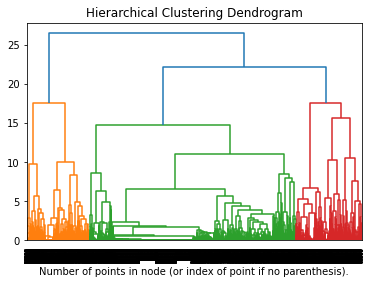

In [64]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [90]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
z_tp4 = hc.fit_predict(X)
z_tp4 = pd.DataFrame(z_tp4, columns = ['Z'])
z_tp4

,Z
0,2
1,2
2,0
3,2
4,2
...,...
15807,2
15808,0
15809,1
15810,2


In [91]:
second_clustering_output = df_vector_extra.join(z_tp4)
z_tp4_predictions = second_clustering_output[['cpc_codes','Y','invention_title','Z']]
z_tp4_predictions





,cpc_codes,Y,invention_title,Z
0,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device'],2
1,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",2,['P and n-type microcrystalline semiconductor ...,2
2,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",2,['Solar cell encapsulation'],0
3,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",2,['Oblique compound parabolic reflector'],2
4,"['G06F9/4843', 'G06F9/4843', 'H01L31/02963', '...",2,['Functional ZnSe:H deposited films'],2
...,...,...,...,...
15807,"['H01L21/02568', 'H01L21/02557', 'H01L21/0256'...",2,['High efficiency CZTSe by a two-step approach'],2
15808,"['H01L31/0322', 'H01L31/0322', 'Y02E10/541', '...",2,['METHOD FOR PRODUCING THIN-FILM LIGHT-ABSORBI...,0
15809,"['G05B11/42', 'H02J3/381', 'H02S10/00', 'H02S5...",2,['METHODS AND APPARATUS FOR CONTROLLING OPERAT...,1
15810,"['H01L31/022433', 'H01L31/0508', 'Y02E10/50', ...",2,['SOLAR CELL AND SOLAR CELL MODULE'],2


In [92]:
for i in range(3):
    get_cpc_cluster_count(z_tp4_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/549    2352
Y02E10/50      847
Y02E10/542     559
Y02E10/547     379
Y02E10/52      271
Y02E10/541     257
Y02E10/548     142
Y02E10/544     139
Y02E10/546      90
Y02E10/40       56
Y02E10/543      44
Y02E10/545      19
Y02E10/44       12
Y02E10/47       10
Y02E10/60        9
Y02E10/56        8
Y02E10/46        3
Y02E10/72        2
dtype: int64

CLUSTER 1
Y02E10/50     1567
Y02E10/52     1130
Y02E10/40      506
Y02E10/56      503
Y02E10/47      502
Y02E10/44      280
Y02E10/547     221
Y02E10/549     181
Y02E10/548     137
Y02E10/60      135
Y02E10/542     110
Y02E10/541      85
Y02E10/76       72
Y02E10/544      71
Y02E10/46       62
Y02E10/546      38
Y02E10/72       35
Y02E10/543      28
Y02E10/545      20
Y02E10/728       8
Y02E10/10        4
Y02E10/20        3
Y02E10/30        3
Y02E10/727       1
dtype: int64

CLUSTER 2
Y02E10/547    3746
Y02E10/50     3384
Y02E10/541    1933
Y02E10/548    1915
Y02E10/549    1586
Y02E10/52     1434
Y02E10/542    1180
Y02E10/544 

In [93]:
cluster_0_coclass = get_cpc_co_cluster_count(z_tp4_predictions, 0)
print(cluster_0_coclass.to_string())
# print()
   

CLUSTER 0
Y02E10/549        2352
Y02P70/50         1938
B82Y10/00          913
Y02E10/50          847
H01L51/0036        671
Y02E10/542         559
H01L51/4253        550
B82Y30/00          514
H01L51/0037        447
C09K11/06          408
H01L51/0043        406
Y02E10/547         379
H01G9/2031         371
H01L51/5012        325
H01G9/2059         302
H01L51/0053        294
H01L51/0035        288
H01L31/048         279
H01L51/0059        278
C08G61/126         278
H01L51/0047        278
H01L31/1804        277
Y02E10/52          271
B82Y20/00          263
Y02E10/541         257
H05B33/14          255
H01L2251/308       252
H01L31/0481        249
H01L51/0072        248
H01L31/049         233
H01L31/18          232
H01L51/0039        230
H01L51/0545        222
H01L51/0078        205
H01L51/4226        204
H01L51/424         198
H01L51/0052        193
H01L51/006         189
H01L51/0038        189
H01L51/5048        189
H01L31/0322        187
H01L51/4246        185
H01L51/0046        184
H

In [95]:
cluster_2_coclass = get_cpc_co_cluster_count(z_tp4_predictions, 2)
print(cluster_2_coclass.to_string())
# print()
  

CLUSTER 2
Y02P70/50         8282
Y02E10/547        3746
Y02E10/50         3384
H01L31/1804       2629
H01L31/022425     2300
Y02E10/541        1933
Y02E10/548        1915
Y02E10/549        1586
Y02E10/52         1434
H01L31/0322       1336
H01L31/068        1322
Y02E10/542        1180
H01L31/202        1180
H01L31/18         1151
Y02E10/544        1074
H01L31/075         996
H01L31/0749        974
H01G9/2031         943
H01L31/048         861
H01L31/046         817
H01L31/022466      793
H01L31/02363       775
H01L31/076         745
H01L31/0682        719
H01L31/02168       712
H01L31/03921       694
H01L31/035281      672
H01L31/1884        664
Y02E10/546         642
H01L31/056         640
H01L21/02532       628
Y02E10/543         592
H01L31/0392        580
H01L31/022441      563
H01L31/02167       547
H01G9/2059         541
H01L31/03529       490
H01L21/0262        484
Y02E10/545         457
H01L31/1864        450
B82Y10/00          446
H01L31/0547        442
H01L31/0687        439
H

# TP5 1980 - 2017

In [20]:
df = pd.read_csv('atp5_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_extra = df_dropped.join(df_cpc)
df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [21]:
df_vector_extra # not re indexed so you could pass those predictions back into the data frame and then filter 

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,H01,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.740513,0.000000,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.090909,0.000000,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.596055,0.010101,0.0,0.000000,0.0,1.596055,0.000000,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114907,0.317271,0.0,0.000000,0.0,0.672033,0.000000,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.142857,0.0,0.000000,0.0,0.142857,0.000000,0.000000,"['H02J3/12', 'H02J3/381', 'H02J3/46', 'H02J13/...",['VOLTAGE CONTROLLER AND VOLTAGE MONITORING DE...
90166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.333333,0.0,0.000000,0.0,0.333333,0.333333,0.000000,"['G05F1/66', 'H02J3/01', 'H02J3/12', 'H02J3/18...",['ENERGY SIGNATURES TO REPRESENT COMPLEX CURRE...
90169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013842,0.000000,0.0,0.013842,0.0,0.013842,0.000000,0.000000,"['B32B33/00', 'B32B37/0046', 'B32B2037/0069', ...",['Fabrication Of Thin-Film Encapsulation Layer...
90179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.096923,0.000000,0.000000,"['F03D1/0675', 'F03D1/0675', 'F03D1/0683', 'F0...",['SPAR CAP FOR A WIND TURBINE ROTOR BLADE']


In [22]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp5 = hc.fit_predict(X)
y_tp5 = pd.DataFrame(y_tp5, columns = ['Y'])
y_tp5

,Y
0,1
1,1
2,0
3,2
4,0
...,...
50856,0
50857,0
50858,2
50859,1


In [23]:
#1st round predictions
df_combined_5 = df_vector_cpc.join(y_tp5)
tp5_predictions = df_combined_5[['cpc_codes','Y','invention_title']]
tp5_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
50856,"['H02J3/12', 'H02J3/381', 'H02J3/46', 'H02J13/...",0,['VOLTAGE CONTROLLER AND VOLTAGE MONITORING DE...
50857,"['G05F1/66', 'H02J3/01', 'H02J3/12', 'H02J3/18...",0,['ENERGY SIGNATURES TO REPRESENT COMPLEX CURRE...
50858,"['B32B33/00', 'B32B37/0046', 'B32B2037/0069', ...",2,['Fabrication Of Thin-Film Encapsulation Layer...
50859,"['F03D1/0675', 'F03D1/0675', 'F03D1/0683', 'F0...",1,['SPAR CAP FOR A WIND TURBINE ROTOR BLADE']


In [24]:
df_vector_extra = df_vector_extra.reset_index(drop=True)

In [25]:
df_vector_extra

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,H01,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.740513,0.000000,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.090909,0.000000,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.596055,0.010101,0.0,0.000000,0.0,1.596055,0.000000,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114907,0.317271,0.0,0.000000,0.0,0.672033,0.000000,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.142857,0.0,0.000000,0.0,0.142857,0.000000,0.000000,"['H02J3/12', 'H02J3/381', 'H02J3/46', 'H02J13/...",['VOLTAGE CONTROLLER AND VOLTAGE MONITORING DE...
50857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.333333,0.0,0.000000,0.0,0.333333,0.333333,0.000000,"['G05F1/66', 'H02J3/01', 'H02J3/12', 'H02J3/18...",['ENERGY SIGNATURES TO REPRESENT COMPLEX CURRE...
50858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013842,0.000000,0.0,0.013842,0.0,0.013842,0.000000,0.000000,"['B32B33/00', 'B32B37/0046', 'B32B2037/0069', ...",['Fabrication Of Thin-Film Encapsulation Layer...
50859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.096923,0.000000,0.000000,"['F03D1/0675', 'F03D1/0675', 'F03D1/0683', 'F0...",['SPAR CAP FOR A WIND TURBINE ROTOR BLADE']


In [26]:
df_vector_extra['Y']= tp5_predictions['Y']


In [27]:
second_clustering_input = df_vector_extra
df_vector_extra = df_vector_extra[df_vector_extra.Y ==2]
df_vector_extra = df_vector_extra.reset_index(drop=True)
#result = pd.concat([df1, df4], axis=1, join="inner")
#second_clustering_input = pd.concat([df_vector_extra, tp2_predictions], axis=1,join='inner')
#.reindex(df1.index)

#second_clustering_input = df_vector_extra.join(tp2_predictions)

In [28]:
second_clustering_input = second_clustering_input[second_clustering_input.Y == 2]
second_clustering_input = second_clustering_input.reset_index(drop=True)

In [29]:
second_clustering_input #then combine this with predictions of second clustering and then you have results from 1st and second clustering 

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,H02,H03,H04,H05,Y02,Y04,Y10,cpc_codes,invention_title,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010101,0.0,0.000000,0.000000,1.596055,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device'],2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.052632,0.0,0.000000,"['C08G2261/312', 'C08L65/02', 'H01B1/128', 'H0...",['Electrically conducting compositions of dope...,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,2.647016,0.0,0.443689,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",['P and n-type microcrystalline semiconductor ...,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.097074,0.0,0.000000,0.000000,0.759154,0.0,0.226319,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",['Solar cell encapsulation'],2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.074074,0.0,0.000000,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",['Oblique compound parabolic reflector'],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.666667,0.666667,0.0,0.000000,"['C07F7/08', 'C07F7/08', 'C07F7/0812', 'C07F7/...","['SILYL-BENZIMIDAZOLO[1,2-A]BENZIMIDAZOLE AS H...",2
18169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.000000,"['H01L51/0036', 'H01L51/0047', 'H01L51/4253', ...",['Light-Transmitting Electrode Having Carbon N...,2
18170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.400000,0.0,0.000000,"['B82Y40/00', 'B82Y20/00', 'B82Y30/00', 'B82Y3...",['NECKLACES OF SILICON NANOWIRES'],2
18171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.111111,0.0,0.000000,"['H01L31/02366', 'H01L31/022425', 'H01L31/0224...",['PHOTOVOLTAIC ELEMENT AND MANUFACTURING METHO...,2


In [30]:
second_clustering_input = second_clustering_input.drop(columns=['cpc_codes','invention_title','Y'])
# second roundnormalize the data attributes
df_normalized_2 = preprocessing.normalize(second_clustering_input)
data_normalized = pd.DataFrame(df_normalized_2, columns=second_clustering_input.columns)
X = data_normalized 

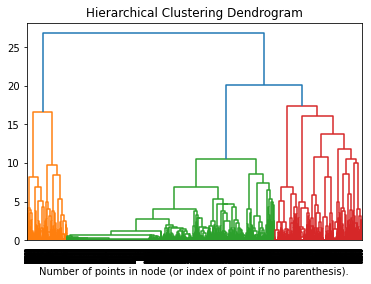

In [86]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [31]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
z_tp5 = hc.fit_predict(X)
z_tp5 = pd.DataFrame(z_tp5, columns = ['Z'])
z_tp5

,Z
0,2
1,1
2,2
3,0
4,2
...,...
18168,1
18169,0
18170,2
18171,0


In [32]:
second_clustering_output = df_vector_extra.join(z_tp5)
z_tp5_predictions = second_clustering_output[['cpc_codes','Y','invention_title','Z']]
z_tp5_predictions





,cpc_codes,Y,invention_title,Z
0,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device'],2
1,"['C08G2261/312', 'C08L65/02', 'H01B1/128', 'H0...",2,['Electrically conducting compositions of dope...,1
2,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",2,['P and n-type microcrystalline semiconductor ...,2
3,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",2,['Solar cell encapsulation'],0
4,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",2,['Oblique compound parabolic reflector'],2
...,...,...,...,...
18168,"['C07F7/08', 'C07F7/08', 'C07F7/0812', 'C07F7/...",2,"['SILYL-BENZIMIDAZOLO[1,2-A]BENZIMIDAZOLE AS H...",1
18169,"['H01L51/0036', 'H01L51/0047', 'H01L51/4253', ...",2,['Light-Transmitting Electrode Having Carbon N...,0
18170,"['B82Y40/00', 'B82Y20/00', 'B82Y30/00', 'B82Y3...",2,['NECKLACES OF SILICON NANOWIRES'],2
18171,"['H01L31/02366', 'H01L31/022425', 'H01L31/0224...",2,['PHOTOVOLTAIC ELEMENT AND MANUFACTURING METHO...,0


In [34]:
for i in range(3):
    get_cpc_cluster_count(z_tp5_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/549    2132
Y02E10/50     1707
Y02E10/547     979
Y02E10/52      604
Y02E10/542     493
Y02E10/541     448
Y02E10/548     366
Y02E10/544     301
Y02E10/546     238
Y02E10/543     167
Y02E10/545      97
Y02E10/40       94
Y02E10/47       27
Y02E10/56       22
Y02E10/44       21
Y02E10/60       17
Y02E10/46        6
Y02E10/30        3
Y02E10/72        2
dtype: int64

CLUSTER 1
Y02E10/549    2264
Y02E10/50      519
Y02E10/542     332
Y02E10/541     139
Y02E10/52      127
Y02E10/547      51
Y02E10/40       11
Y02E10/548       9
Y02E10/544       8
Y02E10/543       5
Y02E10/546       4
Y02E10/44        2
Y02E10/20        1
dtype: int64

CLUSTER 2
Y02E10/547    4710
Y02E10/50     3929
Y02E10/549    2561
Y02E10/541    2290
Y02E10/548    2132
Y02E10/52     1722
Y02E10/544    1403
Y02E10/542    1385
Y02E10/546     694
Y02E10/543     682
Y02E10/545     466
Y02E10/40       93
Y02E10/47       49
Y02E10/60       46
Y02E10/44       40
Y02E10/56       37
Y02E10/72        6
Y02E10/46  

In [67]:
def get_cpc_co_cluster_count(prediction_df, label, cpc_stem='', **kwargs):
    filtered_df = prediction_df[prediction_df.Z == label]
    filtered_cpc_codes = filtered_df.cpc_codes
    cpc_codes_by_label = [ast.literal_eval(row) for row in filtered_cpc_codes]
    cpc_codes_by_label_flat = [item for elem in cpc_codes_by_label for item in elem]
    cpc_series = pd.Series(cpc_codes_by_label_flat)
    cpc_stem_series = cpc_series[cpc_series.str.startswith(cpc_stem)]
    print(f'CLUSTER {label}')
    return(cpc_stem_series.value_counts(**kwargs))

In [77]:
cluster_0_coclass = get_cpc_co_cluster_count(z_tp5_predictions, 0)
print(cluster_0_coclass.to_string())
# print()

    

CLUSTER 0
Y02P70/50         3138
Y02E10/549        2132
Y02E10/50         1707
Y02E10/547         979
B82Y10/00          847
H01L51/0097        806
H01L31/1804        724
H01L2251/5338      623
H01L31/048         620
Y02E10/52          604
H01L31/022425      573
B82Y30/00          540
Y02E10/542         493
H01L31/18          465
Y02E10/541         448
H01L51/4253        420
B82Y20/00          381
H01L51/5253        380
Y02E10/548         366
H01L51/56          334
H01G9/2031         317
H01L51/0036        315
H01L31/068         307
H01L2924/0002      304
H01L31/202         303
Y02E10/544         301
H01L51/0037        296
H01L21/02532       287
H01L31/022466      283
H01L31/0392        283
H01L27/3244        282
H01L31/1884        264
H01L31/0322        262
H01L27/3276        262
H01L21/0262        256
H01L31/0352        248
H01L31/035281      246
H01G9/2059         244
Y02E10/546         238
H01L21/02628       232
H01L31/0547        214
H01B1/22           213
H01L31/0481        209
H

In [78]:
cluster_1_coclass = get_cpc_co_cluster_count(z_tp5_predictions, 1)
print(cluster_1_coclass.to_string())
# print()

CLUSTER 1
Y02E10/549        2264
Y02P70/50          912
C09K11/06          856
H01L51/0036        699
H01L51/0043        589
Y02E10/50          519
H01L51/5012        474
C08G61/126         460
H01L51/0072        456
H01L51/4253        451
B82Y10/00          420
H05B33/14          385
C09K2211/1029      344
H01L51/5016        342
Y02E10/542         332
H01L51/006         321
H01L51/0059        313
C09K2211/1011      309
H01L31/0481        307
H01L51/0035        306
C09K2211/1007      298
H01L51/0085        285
H01L51/0037        272
H01L51/5048        264
H01L51/0053        264
C08G2261/91        261
C09K2211/1044      259
H01L51/0067        257
C09B57/00          242
H01L51/0545        235
H01L31/049         234
C09K2211/185       234
H01L51/0047        233
H01L51/0058        229
H01G9/2031         229
C08G2261/3223      228
H01L51/0039        228
H01L51/0052        228
H01G9/2059         227
H01L51/42          223
C08G61/123         210
C08L65/00          202
H01L51/0094        201
C

In [79]:
cluster_2_coclass = get_cpc_co_cluster_count(z_tp5_predictions, 2)
print(cluster_2_coclass.to_string())
# print()

CLUSTER 2
Y02P70/50         9658
Y02E10/547        4710
Y02E10/50         3929
H01L31/1804       3227
H01L31/022425     3043
Y02E10/549        2561
Y02E10/541        2290
Y02E10/548        2132
H01L31/068        1770
Y02E10/52         1722
H01L31/18         1544
H01L31/0322       1544
Y02E10/544        1403
Y02E10/542        1385
H01L31/0749       1211
H01L31/202        1120
H01L31/0682       1112
H01L31/075        1105
H01L31/022441     1074
H01G9/2031        1070
H01L31/02363      1001
H01L31/02168       993
H01L31/046         953
H01L31/022466      928
H01L31/048         909
H01L31/035281      851
H01L31/02167       836
H01L31/076         801
H01L31/056         766
H01L31/1884        736
H01L31/0747        717
H01L51/0097        716
H01L31/03921       711
Y02E10/546         694
Y02E10/543         682
H01G9/2059         652
H01L31/0392        652
H01L31/1864        645
H01L31/022433      627
H01L31/03529       625
B82Y10/00          600
H01L31/0504        594
H01L21/02532       571
H

# TP6 1980 - 2020

In [91]:
df = pd.read_csv('adf_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_extra = df_dropped.join(df_cpc)
df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [92]:
df_vector_extra # not re indexed so you could pass those predictions back into the data frame and then filter 

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,H02,H03,H04,H05,H99,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.488095,0.0,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.764903,0.0,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010101,0.0,0.0,0.0,0.0,1.696055,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.317271,0.0,0.0,0.0,0.0,0.672033,0.0,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.032258,0.0,0.000000,"['H01L27/1218', 'H01L27/124', 'H01L27/1218', '...",['DISPLAY DEVICE']
115600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.257576,0.0,0.000000,"['E04H9/0215', 'E04H9/0215', 'F03D13/20', 'F16...",['ARRANGEMENTS AND METHODS FOR DAMPING OSCILLA...
115657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,"['C07D495/20', 'C07D495/22', 'H01L51/0061', 'H...",['DISPIRO-OXEPINE/THIAPINE DERIVATIVES FOR OPT...
115668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016264,0.0,0.0,0.0,0.0,0.016264,0.0,0.000000,"['F03D7/0284', 'F03D9/255', 'F05B2220/70646', ...",['System and Method for Minimizing Inrush of C...


In [93]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp6 = hc.fit_predict(X)
y_tp6 = pd.DataFrame(y_tp6, columns = ['Y'])
y_tp6

,Y
0,1
1,1
2,0
3,2
4,0
...,...
62042,2
62043,1
62044,2
62045,1


In [94]:
#1st round predictions
df_combined_6 = df_vector_cpc.join(y_tp6)
tp6_predictions = df_combined_6[['cpc_codes','Y','invention_title']]
tp6_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
62042,"['H01L27/1218', 'H01L27/124', 'H01L27/1218', '...",2,['DISPLAY DEVICE']
62043,"['E04H9/0215', 'E04H9/0215', 'F03D13/20', 'F16...",1,['ARRANGEMENTS AND METHODS FOR DAMPING OSCILLA...
62044,"['C07D495/20', 'C07D495/22', 'H01L51/0061', 'H...",2,['DISPIRO-OXEPINE/THIAPINE DERIVATIVES FOR OPT...
62045,"['F03D7/0284', 'F03D9/255', 'F05B2220/70646', ...",1,['System and Method for Minimizing Inrush of C...


In [95]:
df_vector_extra = df_vector_extra.reset_index(drop=True)

In [96]:
df_vector_extra

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,H02,H03,H04,H05,H99,Y02,Y04,Y10,cpc_codes,invention_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.488095,0.0,0.000000,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",['Rotor withdrawal arrangement for bulb genera...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.764903,0.0,0.000000,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",['Recirculating submersible turbine']
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000,"['F24S10/10', 'Y02E10/44']",['Polymer-gel covered solar energy collector a...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010101,0.0,0.0,0.0,0.0,1.696055,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device']
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.317271,0.0,0.0,0.0,0.0,0.672033,0.0,0.435852,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",['Pulsed motor starter for use with a photovol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.032258,0.0,0.000000,"['H01L27/1218', 'H01L27/124', 'H01L27/1218', '...",['DISPLAY DEVICE']
62043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.257576,0.0,0.000000,"['E04H9/0215', 'E04H9/0215', 'F03D13/20', 'F16...",['ARRANGEMENTS AND METHODS FOR DAMPING OSCILLA...
62044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,"['C07D495/20', 'C07D495/22', 'H01L51/0061', 'H...",['DISPIRO-OXEPINE/THIAPINE DERIVATIVES FOR OPT...
62045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016264,0.0,0.0,0.0,0.0,0.016264,0.0,0.000000,"['F03D7/0284', 'F03D9/255', 'F05B2220/70646', ...",['System and Method for Minimizing Inrush of C...


In [97]:
df_vector_extra['Y']= tp6_predictions['Y']


In [98]:
second_clustering_input = df_vector_extra
df_vector_extra = df_vector_extra[df_vector_extra.Y ==2]
df_vector_extra = df_vector_extra.reset_index(drop=True)
#result = pd.concat([df1, df4], axis=1, join="inner")
#second_clustering_input = pd.concat([df_vector_extra, tp2_predictions], axis=1,join='inner')
#.reindex(df1.index)

#second_clustering_input = df_vector_extra.join(tp2_predictions)

In [99]:
second_clustering_input = second_clustering_input[second_clustering_input.Y == 2]
second_clustering_input = second_clustering_input.reset_index(drop=True)

In [100]:
second_clustering_input #then combine this with predictions of second clustering and then you have results from 1st and second clustering 

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,H03,H04,H05,H99,Y02,Y04,Y10,cpc_codes,invention_title,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.696055,0.0,0.000000,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",['Semiconductor photoelectric conversion device'],2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.052632,0.0,0.000000,"['C08G2261/312', 'C08L65/02', 'H01B1/128', 'H0...",['Electrically conducting compositions of dope...,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,2.649513,0.0,0.444952,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",['P and n-type microcrystalline semiconductor ...,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.798980,0.0,0.226319,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",['Solar cell encapsulation'],2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.074074,0.0,0.000000,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",['Oblique compound parabolic reflector'],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.545455,0.0,0.000000,"['H01L27/3244', 'H01L51/5237', 'H01L27/3246', ...",['LUMINESCENT DISPLAY PANEL'],2
23322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.028571,0.0,0.0,0.028571,0.0,0.000000,"['G06F1/1652', 'G06F1/1652', 'H05K1/028', 'H01...",['FLEXIBLE DISPLAY PANEL AND DISPLAY APPARATUS'],2
23323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.054113,0.0,0.000000,"['H01L51/0097', 'H01L51/5256', 'H01L51/5237', ...","['A FLEXIBLE DISPLAY ASSEMBLY, A MANUFACTURING...",2
23324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.032258,0.0,0.000000,"['H01L27/1218', 'H01L27/124', 'H01L27/1218', '...",['DISPLAY DEVICE'],2


In [101]:
second_clustering_input = second_clustering_input.drop(columns=['cpc_codes','invention_title','Y'])
# second roundnormalize the data attributes
df_normalized_2 = preprocessing.normalize(second_clustering_input)
data_normalized = pd.DataFrame(df_normalized_2, columns=second_clustering_input.columns)
X = data_normalized 

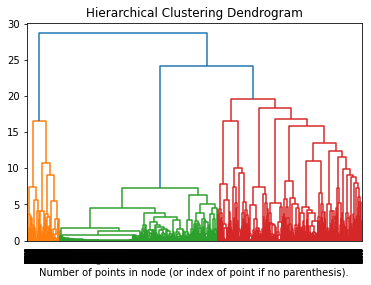

In [102]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters= None,distance_threshold= 0, affinity = 'euclidean', linkage ='ward')

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode='level', p=2000)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [87]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
z_tp6 = hc.fit_predict(X)
z_tp6 = pd.DataFrame(z_tp6, columns = ['Z'])
z_tp6

,Z
0,2
1,1
2,2
3,0
4,2
...,...
18168,1
18169,0
18170,2
18171,0


In [88]:
second_clustering_output = df_vector_extra.join(z_tp6)
z_tp6_predictions = second_clustering_output[['cpc_codes','Y','invention_title','Z']]
z_tp6_predictions





,cpc_codes,Y,invention_title,Z
0,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device'],2
1,"['C08G2261/312', 'C08L65/02', 'H01B1/128', 'H0...",2,['Electrically conducting compositions of dope...,1
2,"['H01L31/076', 'H01L31/076', 'H01L31/03687', '...",2,['P and n-type microcrystalline semiconductor ...,2
3,"['C09J4/06', 'C08F265/06', 'H01L31/048', 'H01L...",2,['Solar cell encapsulation'],0
4,"['F24S23/79', 'G10K11/28', 'G02B5/10', 'Y02E10...",2,['Oblique compound parabolic reflector'],2
...,...,...,...,...
18168,"['C07F7/08', 'C07F7/08', 'C07F7/0812', 'C07F7/...",2,"['SILYL-BENZIMIDAZOLO[1,2-A]BENZIMIDAZOLE AS H...",1
18169,"['H01L51/0036', 'H01L51/0047', 'H01L51/4253', ...",2,['Light-Transmitting Electrode Having Carbon N...,0
18170,"['B82Y40/00', 'B82Y20/00', 'B82Y30/00', 'B82Y3...",2,['NECKLACES OF SILICON NANOWIRES'],2
18171,"['H01L31/02366', 'H01L31/022425', 'H01L31/0224...",2,['PHOTOVOLTAIC ELEMENT AND MANUFACTURING METHO...,0


In [90]:
for i in range(3):
    get_cpc_cluster_count(z_tp6_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/549    2132
Y02E10/50     1707
Y02E10/547     979
Y02E10/52      604
Y02E10/542     493
Y02E10/541     448
Y02E10/548     366
Y02E10/544     301
Y02E10/546     238
Y02E10/543     167
Y02E10/545      97
Y02E10/40       94
Y02E10/47       27
Y02E10/56       22
Y02E10/44       21
Y02E10/60       17
Y02E10/46        6
Y02E10/30        3
Y02E10/72        2
dtype: int64

CLUSTER 1
Y02E10/549    2264
Y02E10/50      519
Y02E10/542     332
Y02E10/541     139
Y02E10/52      127
Y02E10/547      51
Y02E10/40       11
Y02E10/548       9
Y02E10/544       8
Y02E10/543       5
Y02E10/546       4
Y02E10/44        2
Y02E10/20        1
dtype: int64

CLUSTER 2
Y02E10/547    4710
Y02E10/50     3929
Y02E10/549    2561
Y02E10/541    2290
Y02E10/548    2132
Y02E10/52     1722
Y02E10/544    1403
Y02E10/542    1385
Y02E10/546     694
Y02E10/543     682
Y02E10/545     466
Y02E10/40       93
Y02E10/47       49
Y02E10/60       46
Y02E10/44       40
Y02E10/56       37
Y02E10/72        6
Y02E10/46  